# Projet Scraping - Exploration

Dans ce projet, nous allons présenter une technique afin de récolter des donnes directement sur internet : le Web Scrapping.

Définition : Le Web scraping sélectionne des textes sur les sites Internet afin d’obtenir des informations et de les enregistrer. Ce processus est comparable à un copier-coller automatique. Pour la recherche d’images, la dénomination du processus est encore plus précise et s’intitule image scraping.

Dans notre projet, nous allons procéder à la récolte des données des joueurs de NBA sur la saison 2023. Par la suite, nous allons procéder à une exploration de notre jeu de données obtenus dans le cadre d'une simple analyse exploratoire.

Lien url du site web : https://www.basketball-reference.com/leagues/NBA_2023_per_game.html

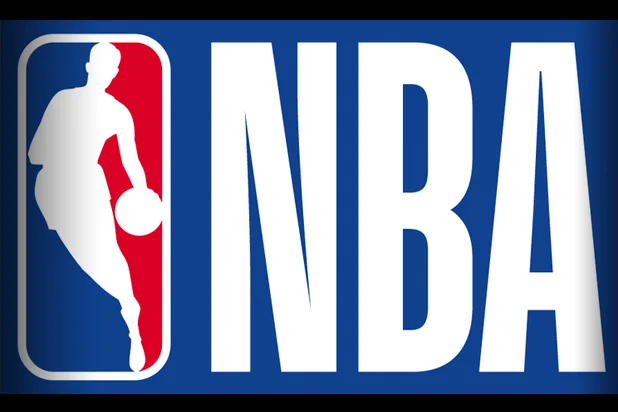

# Sommaire

## I. Importation des bibliothèques

## II. Web scrapping
### 1. Utilisation URL et BeautifulSoup
### 2. Extraction et préparation des données
### 3. Création du jeu de données

## III. Analyse exploratoire
### 1. Analyse statistiques des variables
### 2. Analyse des variables
### 3. Création d'une sélection des meilleurs joueurs

## I. Importation des bibliothèques

In [1]:
# Import package

from bs4 import BeautifulSoup
import requests

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 

## II. Web scrapping
### 1. Utilisation URL et BeautifulSoup

Dans cette première partie, nous allons utiliser notre lien URL pour obtenir les informations souhaités.

Ensuite, nous allons utilisation la librairie BeautifulSoup pour structurer et préparer nos variables

In [2]:
# Collecte du contenu du lien URL

url = 'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'

page = requests.get(url)

# Utilisation Beautiful Soup

soup = BeautifulSoup(page.content, 'html.parser')

# Vérification (le code sera mieux structuré)
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202308191" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var

### 2. Extraction et préparation des données

Dans cette seconde étape, nous allons procéder à l'extraction des informations puis à la préparation des données. Pour cela, nous allons réaliser les étapes suivantes : 
- extraction des informations,
- création de liste des joueurs (540 joueurs) avec test en amont sur 1 seul joueur,
- récupération des colonnes présentent pour structurer notre dataframe.


In [3]:
# Extraction des informations

tableau = soup.find_all(class_ = 'full_table')
tableau

[<tr class="full_table"><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Achiuwa,Precious" data-append-csv="achiupr01" data-stat="player"><a href="/players/a/achiupr01.html">Precious Achiuwa</a></td><td class="center" data-stat="pos">C</td><td class="right" data-stat="age">23</td><td class="left" data-stat="team_id"><a href="/teams/TOR/2023.html">TOR</a></td><td class="right" data-stat="g">55</td><td class="right" data-stat="gs">12</td><td class="right non_qual" data-stat="mp_per_g">20.7</td><td class="right non_qual" data-stat="fg_per_g">3.6</td><td class="right non_qual" data-stat="fga_per_g">7.3</td><td class="right non_qual" data-stat="fg_pct">.485</td><td class="right non_qual" data-stat="fg3_per_g">0.5</td><td class="right non_qual" data-stat="fg3a_per_g">2.0</td><td class="right non_qual" data-stat="fg3_pct">.269</td><td class="right non_qual" data-stat="fg2_per_g">3.0</td><td class="right non_qual" data-stat="fg2a_per_g">5.4</td><td class="ri

In [4]:
# Création liste des joueurs

joueur=[]
for j in tableau[1].find_all('td'):
    print(j)
    joueur.append(j.text)

<td class="left" csk="Adams,Steven" data-append-csv="adamsst01" data-stat="player"><a href="/players/a/adamsst01.html">Steven Adams</a></td>
<td class="center" data-stat="pos">C</td>
<td class="right" data-stat="age">29</td>
<td class="left" data-stat="team_id"><a href="/teams/MEM/2023.html">MEM</a></td>
<td class="right" data-stat="g">42</td>
<td class="right" data-stat="gs">42</td>
<td class="right non_qual" data-stat="mp_per_g">27.0</td>
<td class="right non_qual" data-stat="fg_per_g">3.7</td>
<td class="right non_qual" data-stat="fga_per_g">6.3</td>
<td class="right non_qual" data-stat="fg_pct">.597</td>
<td class="right non_qual iz" data-stat="fg3_per_g">0.0</td>
<td class="right non_qual iz" data-stat="fg3a_per_g">0.0</td>
<td class="right non_qual iz" data-stat="fg3_pct">.000</td>
<td class="right non_qual" data-stat="fg2_per_g">3.7</td>
<td class="right non_qual" data-stat="fg2a_per_g">6.2</td>
<td class="right non_qual" data-stat="fg2_pct">.599</td>
<td class="right non_qual" 

In [5]:
# Maintenant pour tous les joueurs

joueurs=[]
for i in range(len(tableau)):
    joueur=[]
    for j in tableau[i].find_all('td'):
        joueur.append(j.text)
    joueurs.append(joueur)
    
print(joueurs)

[['Precious Achiuwa', 'C', '23', 'TOR', '55', '12', '20.7', '3.6', '7.3', '.485', '0.5', '2.0', '.269', '3.0', '5.4', '.564', '.521', '1.6', '2.3', '.702', '1.8', '4.1', '6.0', '0.9', '0.6', '0.5', '1.1', '1.9', '9.2'], ['Steven Adams', 'C', '29', 'MEM', '42', '42', '27.0', '3.7', '6.3', '.597', '0.0', '0.0', '.000', '3.7', '6.2', '.599', '.597', '1.1', '3.1', '.364', '5.1', '6.5', '11.5', '2.3', '0.9', '1.1', '1.9', '2.3', '8.6'], ['Bam Adebayo', 'C', '25', 'MIA', '75', '75', '34.6', '8.0', '14.9', '.540', '0.0', '0.2', '.083', '8.0', '14.7', '.545', '.541', '4.3', '5.4', '.806', '2.5', '6.7', '9.2', '3.2', '1.2', '0.8', '2.5', '2.8', '20.4'], ['Ochai Agbaji', 'SG', '22', 'UTA', '59', '22', '20.5', '2.8', '6.5', '.427', '1.4', '3.9', '.355', '1.4', '2.7', '.532', '.532', '0.9', '1.2', '.812', '0.7', '1.3', '2.1', '1.1', '0.3', '0.3', '0.7', '1.7', '7.9'], ['Santi Aldama', 'PF', '22', 'MEM', '77', '20', '21.8', '3.2', '6.8', '.470', '1.2', '3.5', '.353', '2.0', '3.4', '.591', '.560', '

In [6]:
# Test sur joueur 1
joueurs[1]

['Steven Adams',
 'C',
 '29',
 'MEM',
 '42',
 '42',
 '27.0',
 '3.7',
 '6.3',
 '.597',
 '0.0',
 '0.0',
 '.000',
 '3.7',
 '6.2',
 '.599',
 '.597',
 '1.1',
 '3.1',
 '.364',
 '5.1',
 '6.5',
 '11.5',
 '2.3',
 '0.9',
 '1.1',
 '1.9',
 '2.3',
 '8.6']

In [7]:
# Obtention des colonnes
head = soup.find(class_='thead')
columns_name=[head.text for item in head][0]


# Supprimer le \n
columns_name_clean = columns_name.split('\n')[2:-1]
columns_name_clean

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

### 3. Création du jeu de données

Dans cette dernière étape du Web Scrapping, nous allons finaliser l'extraction des données à travers la création du dataframe.

Par la suite, nous allons transformer certaines variables au format souhaité. Attention, cette étape est effectuée après une première analyse, de la nature des colonnes.

In [8]:
# Création base de données

df = pd.DataFrame(joueurs, columns = columns_name_clean)

# Transformation des colonnes objets en numériques sauf joueur, poste et équipe

# Liste des colonnes à exclure de la conversion
colonnes_a_exclure = ['Player', 'Pos', 'Tm']

# Liste des colonnes à convertir en numériques
colonnes_a_convertir = [col for col in df.columns if col not in colonnes_a_exclure]

# Convertissez les colonnes sélectionnées en numériques
df[colonnes_a_convertir] = df[colonnes_a_convertir].apply(pd.to_numeric, errors='coerce')

df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
535,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
536,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
537,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [9]:
# Sauvegardez le DataFrame en format CSV
df.to_csv('scrapnba2023.csv', index=False)

Nous avons finalisé notre étape du scrapping. Notre jeu de données est à présent prêt pour notre étape de l'analyse exploratoire.

# 

## III. Analyse exploratoire
### 1. Analyse statistiques des variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  539 non-null    object 
 1   Pos     539 non-null    object 
 2   Age     539 non-null    int64  
 3   Tm      539 non-null    object 
 4   G       539 non-null    int64  
 5   GS      539 non-null    int64  
 6   MP      539 non-null    float64
 7   FG      539 non-null    float64
 8   FGA     539 non-null    float64
 9   FG%     537 non-null    float64
 10  3P      539 non-null    float64
 11  3PA     539 non-null    float64
 12  3P%     523 non-null    float64
 13  2P      539 non-null    float64
 14  2PA     539 non-null    float64
 15  2P%     534 non-null    float64
 16  eFG%    537 non-null    float64
 17  FT      539 non-null    float64
 18  FTA     539 non-null    float64
 19  FT%     515 non-null    float64
 20  ORB     539 non-null    float64
 21  DRB     539 non-null    float64
 22  TR

<Axes: >

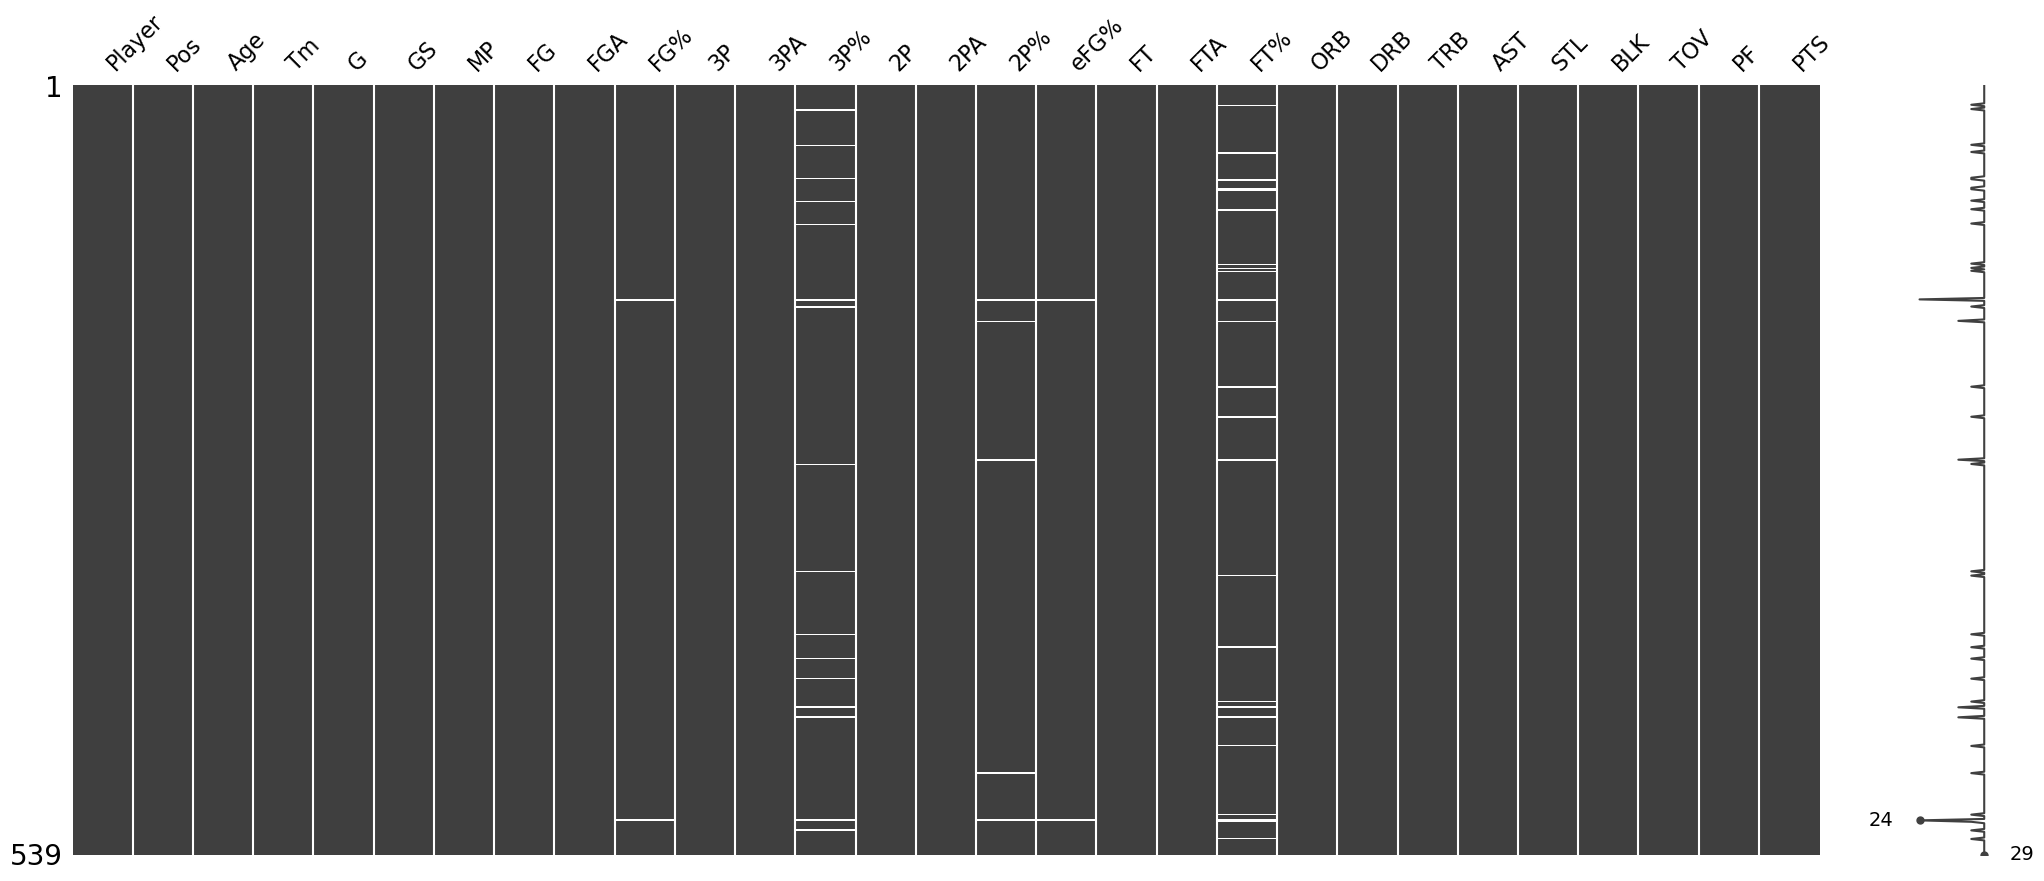

In [11]:
# Représentation graphique des variables manquantes avec missingno
msno.matrix(df)

In [12]:
# Analyse moyenne valeurs manquantes

df.isnull().mean()*100

Player    0.000000
Pos       0.000000
Age       0.000000
Tm        0.000000
G         0.000000
GS        0.000000
MP        0.000000
FG        0.000000
FGA       0.000000
FG%       0.371058
3P        0.000000
3PA       0.000000
3P%       2.968460
2P        0.000000
2PA       0.000000
2P%       0.927644
eFG%      0.371058
FT        0.000000
FTA       0.000000
FT%       4.452690
ORB       0.000000
DRB       0.000000
TRB       0.000000
AST       0.000000
STL       0.000000
BLK       0.000000
TOV       0.000000
PF        0.000000
PTS       0.000000
dtype: float64

Nous avons pu constater la présence d'une faible présence de valeurs manquantes.
Seul quelques variables sont très légérement impactés avec un maximum de 4,4% de valeurs manquantes.

Dans notre phase d'exploration, nous n'allons pas procéder à un traitement des valeurs manquantes.
Bien entendu, dans une étape de modélisation, ce traitement sera primordial. Cependant, cette phase ne sera pas réalisé dans ce projet d'exploration des données.

### 2. Analyse des variables

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,539.0,25.727273,4.290326,19.0,23.0000,25.0000,28.50000,42.0
G,539.0,48.040816,24.650686,1.0,30.5000,54.0000,68.00000,83.0
GS,539.0,22.820037,27.295285,0.0,1.0000,8.0000,46.50000,83.0
MP,539.0,19.796846,9.544958,1.0,12.4500,19.2000,28.35000,41.0
FG,539.0,3.348980,2.436261,0.0,1.6000,2.7000,4.50000,11.2
FGA,539.0,7.104638,4.956779,0.0,3.4000,5.8000,9.45000,22.2
FG%,537.0,0.464983,0.106153,0.0,0.4170,0.4550,0.50600,1.0
3P,539.0,0.990538,0.872442,0.0,0.3000,0.8000,1.50000,4.9
3PA,539.0,2.782560,2.244579,0.0,1.0000,2.4000,4.10000,11.4
3P%,523.0,0.324952,0.127414,0.0,0.2885,0.3450,0.38550,1.0


###### Analyse Age ('Age') des joueurs

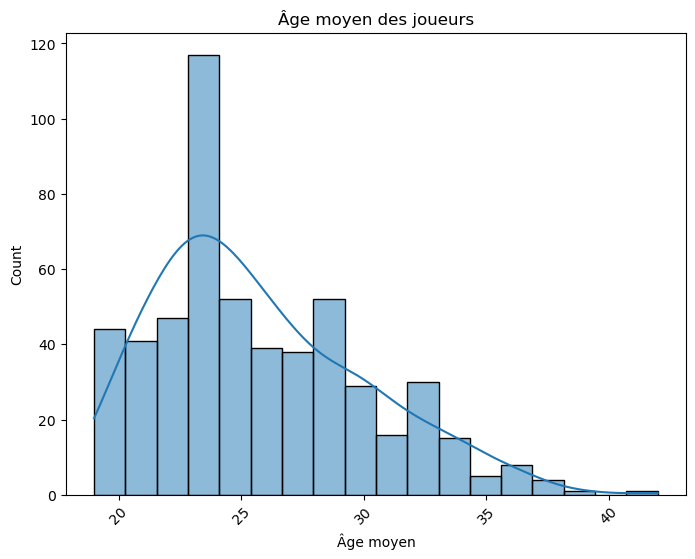

In [14]:
# Créer un graphique à barres pour l'âge moyen
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=df, kde=True)
plt.xlabel("Âge moyen")
plt.title("Âge moyen des joueurs")
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Afficher le graphique
plt.show()

###### Analyse Poste ('Pos') des joueurs

SG       126
C        108
SF       103
PF       102
PG        91
SG-PG      2
SF-SG      2
PG-SG      2
SF-PF      1
PF-C       1
PF-SF      1
Name: Pos, dtype: int64


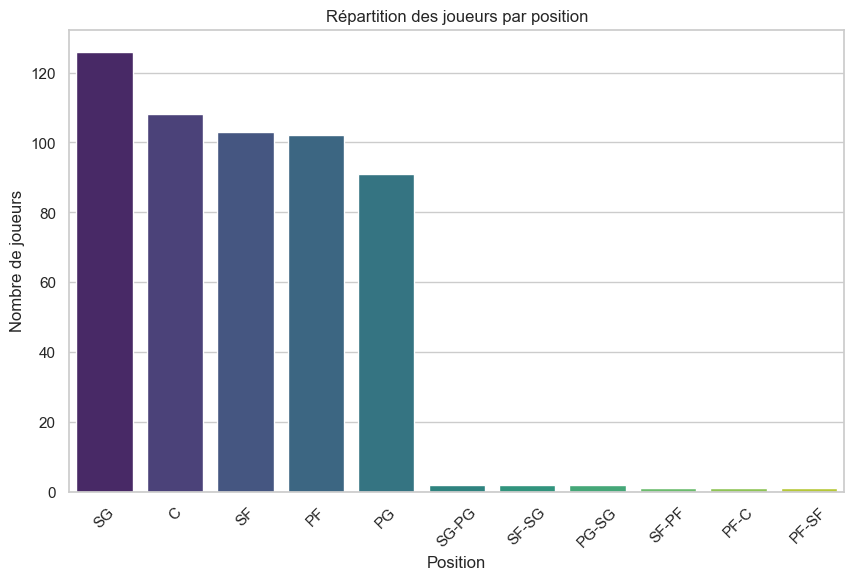

In [15]:
print(df['Pos'].value_counts())

# Calculer le décompte des valeurs dans la colonne 'Pos'
pos_counts = df['Pos'].value_counts()

# Créer un graphique à barres avec Seaborn
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
sns.set(style="whitegrid")  # Utiliser un style de grille

# Créer le graphique à barres
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette="viridis")

# Ajouter des étiquettes et un titre
plt.xlabel("Position")
plt.ylabel("Nombre de joueurs")
plt.title("Répartition des joueurs par position")

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

Compréhension des postes :
- SG : arrière shooter
- C : pivot
- SF : ailier
- PF: ailier fort
- PG : meneur

Ici, nous avons quelques joueurs présentant des postes spécifiques.
Nous allons simplement prendre le nombre de ces joueurs puis effectuer une recherche internet pour connaître le poste précis. Puis, nous allons renommer le poste.

In [16]:
# Liste des positions à filtrer
positions_a_filtrer = ['SG-PG', 'SF-SG', 'PG-SG', 'SF-PF', 'PF-C', 'PF-SF']

# Filtrer les joueurs en fonction des positions spécifiques
joueurs_filtres = df[df['Pos'].str.contains('|'.join(positions_a_filtrer))]

# Afficher les joueurs filtrés
joueurs_filtres

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,Patrick Beverley,SG-PG,34,TOT,67,67,27.1,2.1,5.4,0.400,1.2,3.6,0.335,1.0,1.8,0.529,0.511,0.7,1.0,0.723,0.7,3.0,3.7,2.9,0.9,0.6,0.9,2.8,6.2
57,Mikal Bridges,SF-SG,26,TOT,83,83,35.7,7.1,15.3,0.468,2.0,5.3,0.382,5.1,9.9,0.514,0.535,3.8,4.3,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
122,Spencer Dinwiddie,SG-PG,29,TOT,79,79,34.5,5.8,13.3,0.438,2.3,6.2,0.369,3.5,7.1,0.498,0.524,3.4,4.2,0.812,0.4,3.1,3.4,6.5,0.8,0.3,1.8,2.4,17.3
210,George Hill,PG-SG,36,TOT,46,1,18.1,1.7,3.6,0.470,0.7,2.1,0.358,1.0,1.5,0.620,0.572,0.9,1.2,0.764,0.3,1.5,1.8,2.4,0.6,0.1,0.7,1.2,5.0
229,Kyrie Irving,PG-SG,30,TOT,60,60,37.4,9.9,20.1,0.494,3.1,8.3,0.379,6.8,11.8,0.574,0.572,4.1,4.6,0.905,1.0,4.1,5.1,5.5,1.1,0.8,2.1,2.8,27.1
270,Kevin Knox,SF-PF,23,TOT,63,5,15.1,2.4,5.3,0.458,1.0,3.0,0.349,1.4,2.3,0.596,0.556,0.7,1.0,0.767,0.5,2.3,2.8,0.5,0.4,0.2,0.8,1.5,6.6
429,Dario Šarić,PF-C,28,TOT,57,12,14.1,2.2,4.9,0.458,0.8,2.0,0.391,1.4,2.8,0.506,0.540,1.1,1.3,0.829,0.9,2.7,3.6,1.3,0.4,0.1,1.0,1.7,6.4
472,Matisse Thybulle,SF-SG,25,TOT,71,28,16.9,1.5,3.6,0.435,0.8,2.1,0.365,0.8,1.5,0.533,0.542,0.3,0.4,0.679,0.6,1.4,2.0,0.7,1.2,0.5,0.3,1.6,4.1
497,T.J. Warren,PF-SF,29,TOT,42,0,16.4,3.1,6.4,0.489,0.5,1.6,0.328,2.6,4.8,0.542,0.530,0.7,0.8,0.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5


Après recherches, nous allons procéder à la modification du poste de certains joueurs. L'objectif étant de simplifier l'analyse avec uniquement le poste priviligié du joueur.

In [17]:
# Définir les remplacements à effectuer sous forme de dictionnaire
remplacements = {
    'SG-PG': 'PG',
    'PF-SF': 'SG',
    'PG-SG': 'PG',
    'PF-C': 'PF',
    'SF-PF': 'SF',
    'SF-SG': 'PG'
}

# Fonction pour appliquer les remplacements à une colonne spécifique
def corriger_positions(dataframe, colonne, remplacements):
    for ancienne, nouvelle in remplacements.items():
        dataframe[colonne] = dataframe[colonne].str.replace(ancienne, nouvelle)

# Appeler la fonction pour corriger la colonne 'Pos'
corriger_positions(df, 'Pos', remplacements)

# Vérification du résultat
print(df['Pos'].value_counts())

SG    127
C     108
SF    104
PF    103
PG     97
Name: Pos, dtype: int64


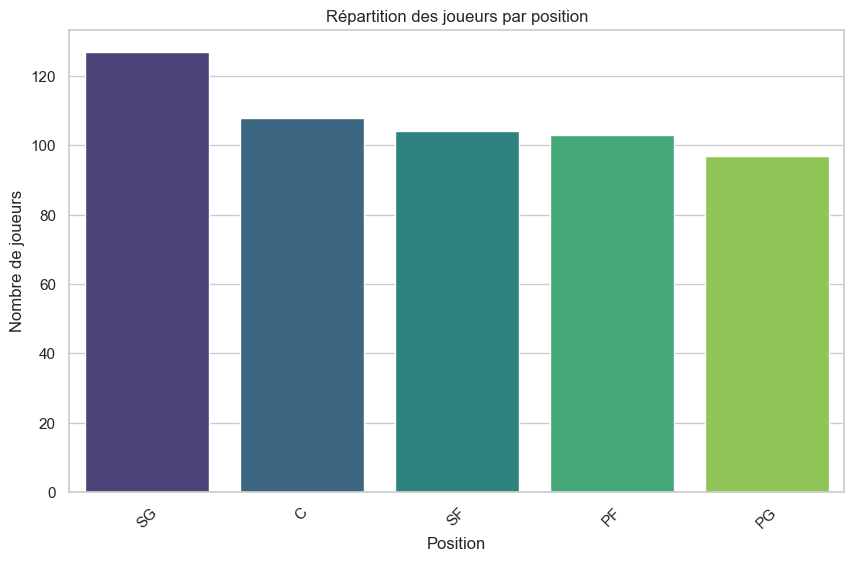

In [18]:
# Calculer le décompte des valeurs dans la colonne 'Pos'
pos_counts = df['Pos'].value_counts()

# Créer un graphique à barres avec Seaborn
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
sns.set(style="whitegrid")  # Utiliser un style de grille

# Créer le graphique à barres
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette="viridis")

# Ajouter des étiquettes et un titre
plt.xlabel("Position")
plt.ylabel("Nombre de joueurs")
plt.title("Répartition des joueurs par position")

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

In [19]:
print(df['Tm'].value_counts())

TOT    70
WAS    19
SAC    19
SAS    18
POR    18
DAL    17
MEM    17
TOR    17
UTA    17
MIL    17
CLE    16
MIA    16
BOS    16
IND    16
ORL    16
PHI    16
CHO    16
GSW    16
DET    16
ATL    15
CHI    15
NOP    15
OKC    15
MIN    15
LAC    14
DEN    14
HOU    14
NYK    13
BRK    13
PHO    12
LAL    11
Name: Tm, dtype: int64


Cette variable ne semble pas pertinente pour notre analyse. Nous allons procéder à la suppression de cette colonne.

In [20]:
# Suppression colonne

df.drop(columns = ['Tm'], inplace = True)

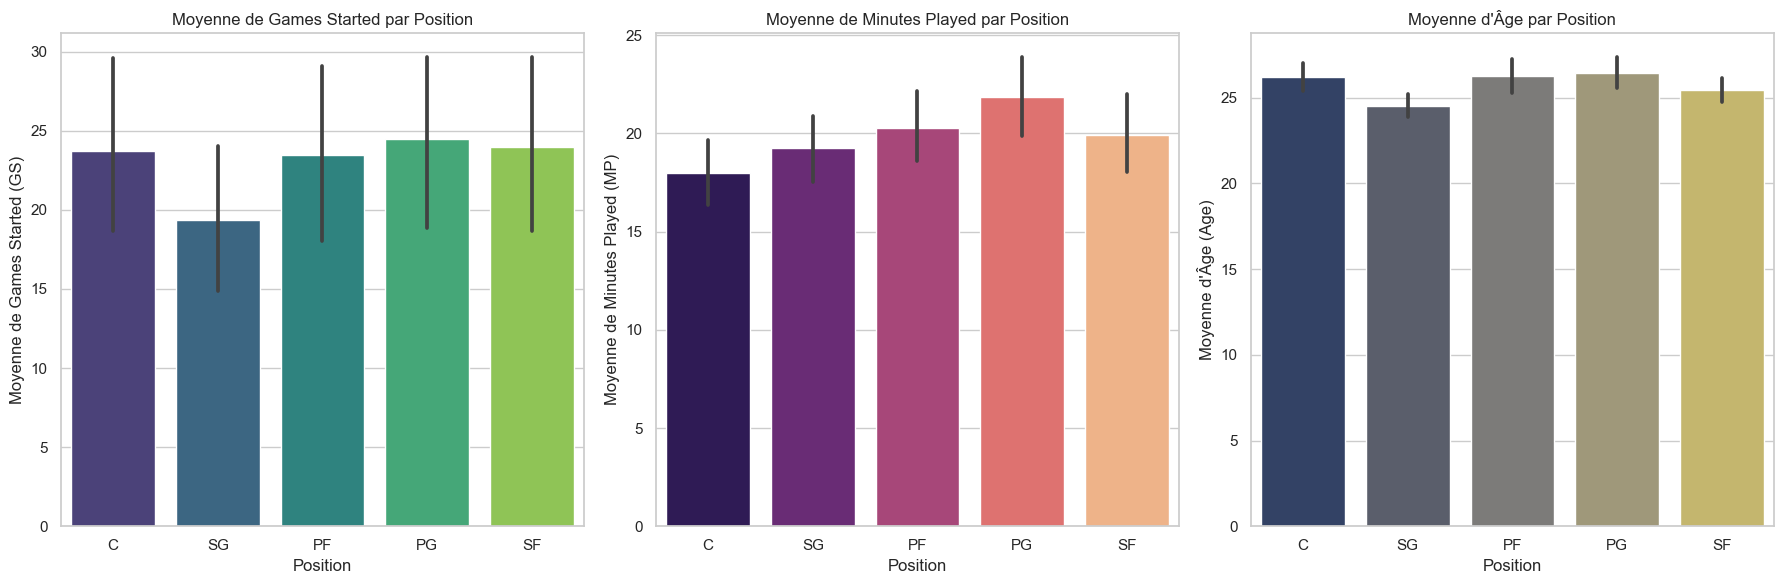

In [21]:
# Sélectionnez les variables d'intérêt et la variable 'Pos' et 'Age'
subset_df = df[['Pos', 'GS', 'MP', 'Age']]

# Créez un graphique à barres pour 'GS' en fonction de 'Pos'
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # Créer le premier subplot
sns.barplot(x='Pos', y='GS', data=subset_df, palette="viridis")
plt.xlabel("Position")
plt.ylabel("Moyenne de Games Started (GS)")
plt.title("Moyenne de Games Started par Position")

# Créez un graphique à barres pour 'MP' en fonction de 'Pos'
plt.subplot(1, 3, 2)  # Créer le deuxième subplot
sns.barplot(x='Pos', y='MP', data=subset_df, palette="magma")
plt.xlabel("Position")
plt.ylabel("Moyenne de Minutes Played (MP)")
plt.title("Moyenne de Minutes Played par Position")

# Créez un graphique à barres pour 'Age' en fonction de 'Pos'
plt.subplot(1, 3, 3)  # Créer le troisième subplot
sns.barplot(x='Pos', y='Age', data=subset_df, palette="cividis")
plt.xlabel("Position")
plt.ylabel("Moyenne d'Âge (Age)")
plt.title("Moyenne d'Âge par Position")

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


A travers l'analyse de nos premiers graphiques, il est interessant de constater une forte présence des joueurs de 25 ans.
Dans les différents postes, nous remarquons une représentation plutôt homogène même si le poste d'arrière est le plus représenté. Toutefois, il faut bien prendre en considération que certains joueurs ont la capacité de jouer à plusieurs postes comme nous l'avons constaté.

Quand nous analysons les graphiques ci-dessus, nous pouvons noter les éléments suivants :
- le nombre de matchs joués est similaires en fonction des postes (légérement inférieur pour le poste d'arrière mais plus de joueurs à cette place),
- le poste de meneurs à tendance à jouer plus longtemps que les autres postes tandis que le pivot à tendance à jouer avec une durée plus faible (l'écart entre les postes se joue à 2 voir 3 minutes en moyenne, l'écart reste donc marginal).
- l'âge reste très équilibré en fonction des postes, cette variable peut facilement être impacté par quelques joueurs bien plus âgé que la moyenne (Haslem a 42 ans, James a 37 ans par exemple).

Malgré un équilibre notable dans cette première analyse, cela nous a permis de mieux comprendre nos variables.

###### Analyse boxplot pour les variables numériques

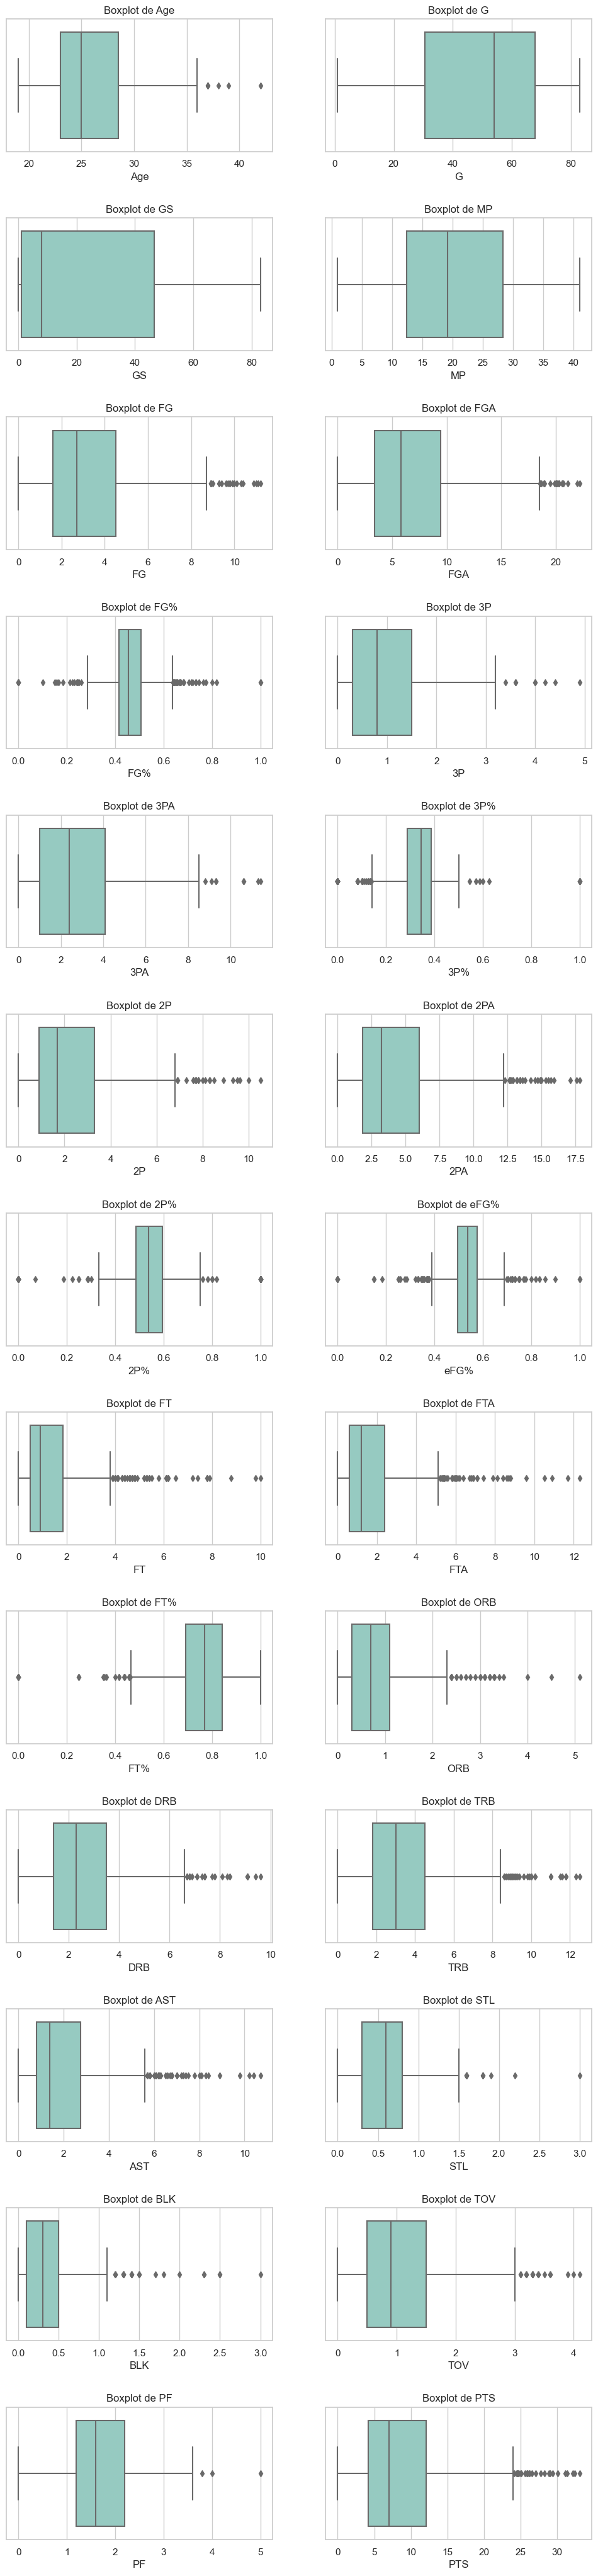

In [22]:
# Sélectionnez uniquement les variables numériques
numeric_variables = df.select_dtypes(include=['int64', 'float64'])

# Déterminez le nombre de lignes et de colonnes en fonction du nombre de variables
num_vars = len(numeric_variables.columns)
num_cols = 2  # Vous pouvez ajuster le nombre de colonnes ici
num_rows = (num_vars + num_cols - 1) // num_cols

# Définissez la taille de la figure en fonction du nombre de sous-plots
fig_width = 12
fig_height = 4 * num_rows

# Créez un graphique en boxplot pour chaque variable numérique
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

for i, col in enumerate(numeric_variables.columns):
    row, col_index = divmod(i, num_cols)
    ax = axes[row, col_index]
    sns.boxplot(x=col, data=df, palette="Set3", ax=ax)
    ax.set_xlabel(col)
    ax.set_title(f"Boxplot de {col}")

# Ajustez l'espacement vertical entre les sous-plots
plt.subplots_adjust(hspace=0.5)

# Affichez les graphiques
plt.show()

Dans notre analyse, il est important de constater le présence de valeurs aberrantes sur l'ensemble des variables.
Dans une analyse liée au sport, il est cohérent d'avoir des variables aberrantes pouvant être liés à des sportifs hors normes (LeBron James ou Curry par exemple). Nous allons pas procéder à un traitement de ces variables.

###### Analyse points en fonction du poste

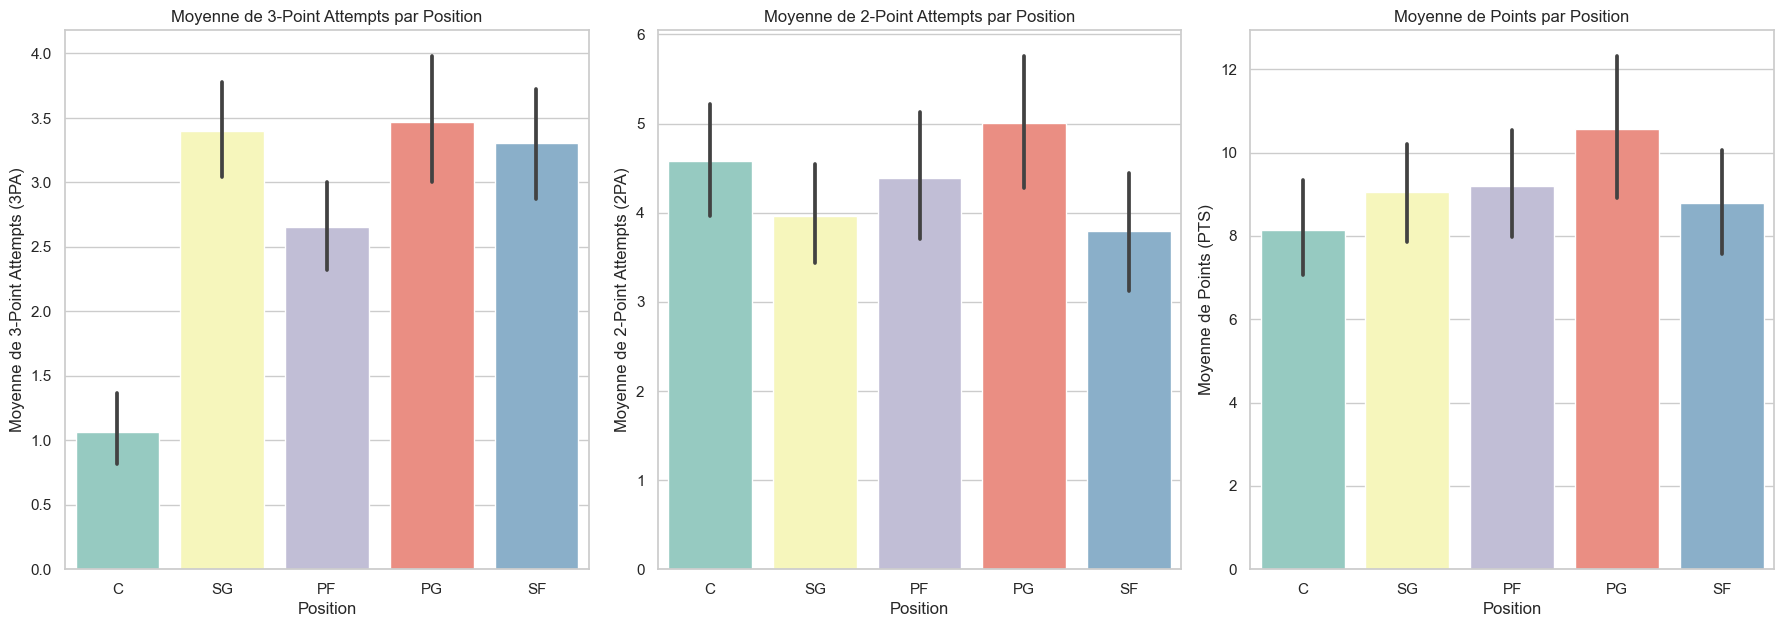

In [23]:
# Sélectionnez les variables d'intérêt et la variable 'Pos' et 'Age'
subset_df = df[['Pos', '3PA', '2PA', 'PTS']]

# Créez un graphique à barres pour chaque variable en fonction de 'Pos'
plt.figure(figsize=(18, 12))

# Graphique pour '3PA'
plt.subplot(2, 3, 4)
sns.barplot(x='Pos', y='3PA', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de 3-Point Attempts (3PA)")
plt.title("Moyenne de 3-Point Attempts par Position")

# Graphique pour '2PA'
plt.subplot(2, 3, 5)
sns.barplot(x='Pos', y='2PA', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de 2-Point Attempts (2PA)")
plt.title("Moyenne de 2-Point Attempts par Position")

# Graphique pour 'PTS'
plt.subplot(2, 3, 6)
sns.barplot(x='Pos', y='PTS', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de Points (PTS)")
plt.title("Moyenne de Points par Position")

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

Dans cette seconde étape, nous avons choisi d'explorer les meilleurs marqueurs en nombre et non en %.

Plusieurs constats :
- le poste de pivot a une tendance a marqué très peu de paniers à 3 points à l'instar d'un ailier ou d'un meneur par exemple, ce qui est cohérent avec la position du joueur sur le terrain,
- concernant les paniers à 2 points, les meneurs restent également le poste priviligié pour marquer avec une forte présence également des pivots, cela peut être lié à la notion de rebonds (récupération du ballon suite à un tir manqué), cette hypothèse se doit d'être analysé dans une analyse des variables rebonds,
- le poste de meneur est donc celui qui va avoir tendance à marquer davantage de points que les autres postes avec une moyenne d'environ 11 points par matchs.

De nouveau, nous insistons sur la notion des valeurs aberrantes avec certains joueurs ayant de très fortes capacités à 'scorer' sur un poste spécifique.
Pour cela, nous allons analyser le top 5 des tireurs et en déduire une tendance.

In [24]:
# Top 5 tireurs à 3 points

# Triez le DataFrame par '3PA' en ordre décroissant et sélectionnez les 5 premiers
top_5_3pa = df[['Player', '3PA', 'Pos']].sort_values(by='3PA', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour '3PA'
print("Top 5 joueurs pour 3PA :")
print(top_5_3pa)

Top 5 joueurs pour 3PA :
               Player   3PA Pos
107     Stephen Curry  11.4  PG
291    Damian Lillard  11.3  PG
470     Klay Thompson  10.6  SF
20        LaMelo Ball  10.6  PG
337  Donovan Mitchell   9.3  SG


In [25]:
# Top 5 tireurs à 2 points

# Triez le DataFrame par '2PA' en ordre décroissant et sélectionnez les 5 premiers
top_5_2pa = df[['Player', '2PA', 'Pos']].sort_values(by='2PA', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour '2PA'
print("Top 5 joueurs pour 2PA :")
print(top_5_2pa)

Top 5 joueurs pour 2PA :
                      Player   2PA Pos
163  Shai Gilgeous-Alexander  17.8  PG
10     Giannis Antetokounmpo  17.6  PF
142              Joel Embiid  17.1   C
109            Anthony Davis  15.9   C
116            DeMar DeRozan  15.7  SF


In [26]:
# Top 5 moyenne de points

# Triez le DataFrame par 'PTS' en ordre décroissant et sélectionnez les 5 premiers
top_5_pts = df[['Player', 'PTS', 'Pos']].sort_values(by='PTS', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour 'PTS'
print("Top 5 joueurs pour PTS :")
print(top_5_pts)

Top 5 joueurs pour PTS :
                      Player   PTS Pos
142              Joel Embiid  33.1   C
124              Luka Dončić  32.4  PG
291           Damian Lillard  32.2  PG
163  Shai Gilgeous-Alexander  31.4  PG
10     Giannis Antetokounmpo  31.1  PF


Dans ce top 5 des meilleurs tireurs au 3, 2 et moyenne de points, l'ensemble des joueurs dépassent fortement la moyenne de l'ensemble des joueurs.
Cela confirme notre hypothèse, à savoir que certains joueurs présentent des statistiques très élevés.

Nous avons pu confirmer notre hypothèse que certains joueurs présentent des statistiques nettement supérieurs à la moyenne.
De plus, dans notre top 5 des meilleurs marqueurs, le poste de meneur est le plus présent (3/5 des meilleurs moyennes de points par matchs).

A présent, nous allons analyser la notion des rebonds par matchs. Cela pourra également nous permettre de vérifier notre hypothèse sur le rôle des pivots et des récupérations à proximité de la raquette (panier) et donc de marquer plus aisément des paniers à 2 points.

###### Analyse rebonds en fonction du poste

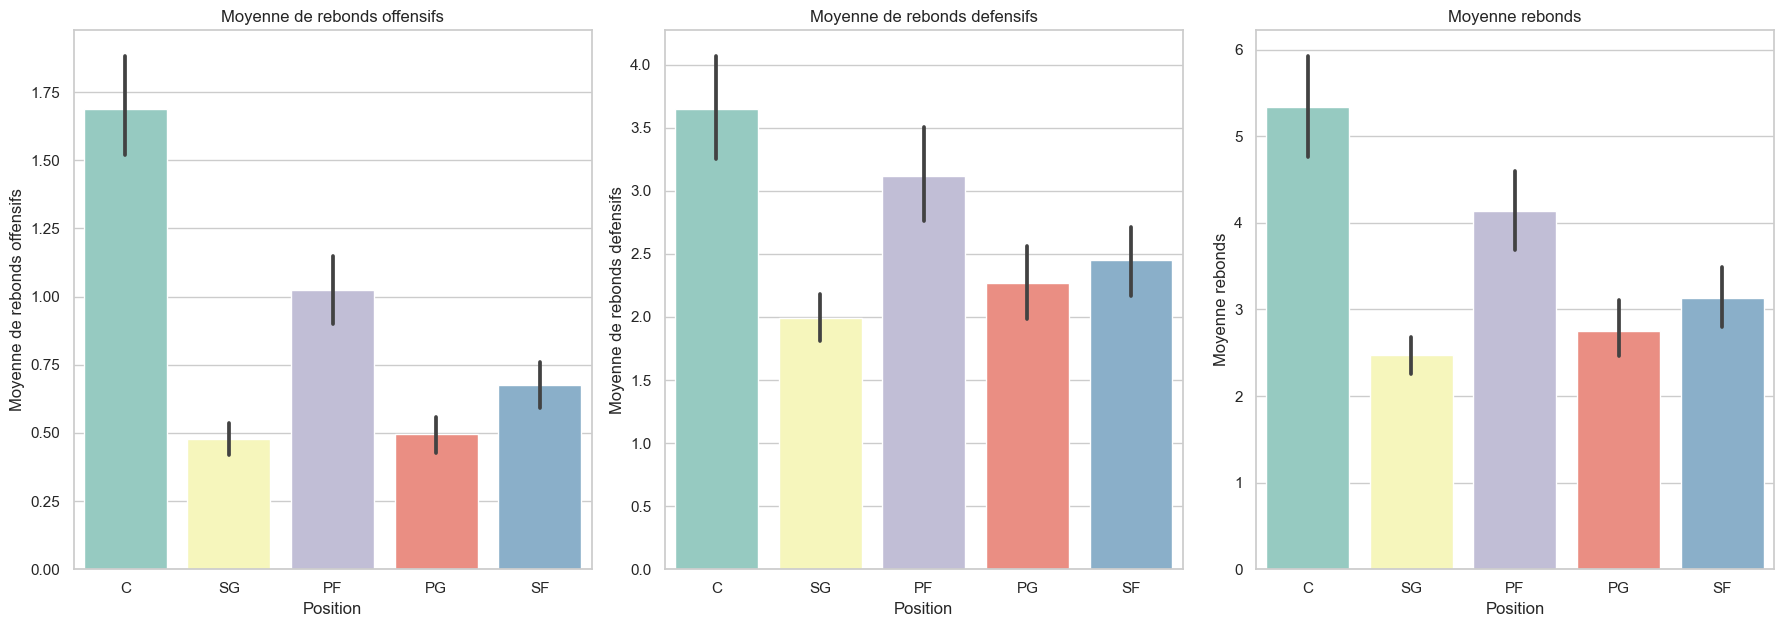

In [27]:
# Sélectionnez les variables d'intérêt et la variable 'Pos' et 'Age'
subset_df = df[['Pos', 'ORB', 'DRB', 'TRB']]

# Créez un graphique à barres pour chaque variable en fonction de 'Pos'
plt.figure(figsize=(18, 12))

# Graphique pour 'ORB'
plt.subplot(2, 3, 4)
sns.barplot(x='Pos', y='ORB', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de rebonds offensifs")
plt.title("Moyenne de rebonds offensifs")

# Graphique pour 'DRB'
plt.subplot(2, 3, 5)
sns.barplot(x='Pos', y='DRB', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de rebonds defensifs")
plt.title("Moyenne de rebonds defensifs")

# Graphique pour 'TRB'
plt.subplot(2, 3, 6)
sns.barplot(x='Pos', y='TRB', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne rebonds")
plt.title("Moyenne rebonds")

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

Dans cette représentation, nous constatons de suite la très forte présence du poste de pivots dans les rebonds moyens et la faible présence des meneurs et ailiers.

Nous allons procéder à une analyse du top 5 et vérifier notre hypothèse.

In [28]:
# Top 5 rebonds offensifs

# Triez le DataFrame par 'ORB' en ordre décroissant et sélectionnez les 5 premiers
top_5_orb = df[['Player', 'ORB', 'Pos', '2PA']].sort_values(by='ORB', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour 'ORB'
print("Top 5 joueurs pour ORB :")
print(top_5_orb)

Top 5 joueurs pour ORB :
                Player  ORB Pos   2PA
1         Steven Adams  5.1   C   6.2
415  Mitchell Robinson  4.5   C   4.7
80        Clint Capela  4.0   C   8.2
109      Anthony Davis  3.5   C  15.9
137        Jalen Duren  3.4   C   5.9


In [29]:
# Top 5 rebonds défensifs

# Triez le DataFrame par 'ORB' en ordre décroissant et sélectionnez les 5 premiers
top_5_drb = df[['Player', 'DRB', 'Pos', '2PA']].sort_values(by='DRB', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour 'ORB'
print("Top 5 joueurs pour DRB :")
print(top_5_drb)

Top 5 joueurs pour DRB :
                    Player  DRB Pos   2PA
10   Giannis Antetokounmpo  9.6  PF  17.6
248           Nikola Jokić  9.4   C  12.7
109          Anthony Davis  9.1   C  15.9
427       Domantas Sabonis  9.1   C  10.8
488         Nikola Vučević  9.1   C   9.8


In [30]:
# Top 5 rebonds 

# Triez le DataFrame par 'TRB' en ordre décroissant et sélectionnez les 5 premiers
top_5_trb = df[['Player', 'TRB', 'Pos', '2PA']].sort_values(by='TRB', ascending=False).head(5)

# Affichez les 5 meilleurs joueurs pour 'TRB'
print("Top 5 joueurs pour TRB :")
print(top_5_trb)

Top 5 joueurs pour TRB :
                    Player   TRB Pos   2PA
109          Anthony Davis  12.5   C  15.9
427       Domantas Sabonis  12.3   C  10.8
10   Giannis Antetokounmpo  11.8  PF  17.6
248           Nikola Jokić  11.8   C  12.7
166            Rudy Gobert  11.6   C   7.8


Dans les meilleurs joueurs au rebond, nous constatons qu'un joueur apparaît de nouveau parmi les meilleurs élements : Giannis Antetokounmpo.
Ce joueur présente d'excellentes statistiques dans les tirs mais également dans les rebonds.

Concernant notre hypothèse, nous pouvons valider notre idée, à savoir :
Le poste de pivot va avoir tendance à récupérer davantage de ballons lui permettant une position plus aisée pour marquer des paniers à 2 points. Cela va naturellement diminuer son nombre de paniers à 3 points.

###### Analyse variables diverses

Dans cette dernière étape, nous allons regarder quelques variables pour avoir une meilleure vision des joueurs.
Pour cela, nous allons regarder les données suivantes : 
- steals (interception) : 'STL'
- assists (passes clés) : AST
- block (blocage) : BLK
- personnal fault (fautes) : PF

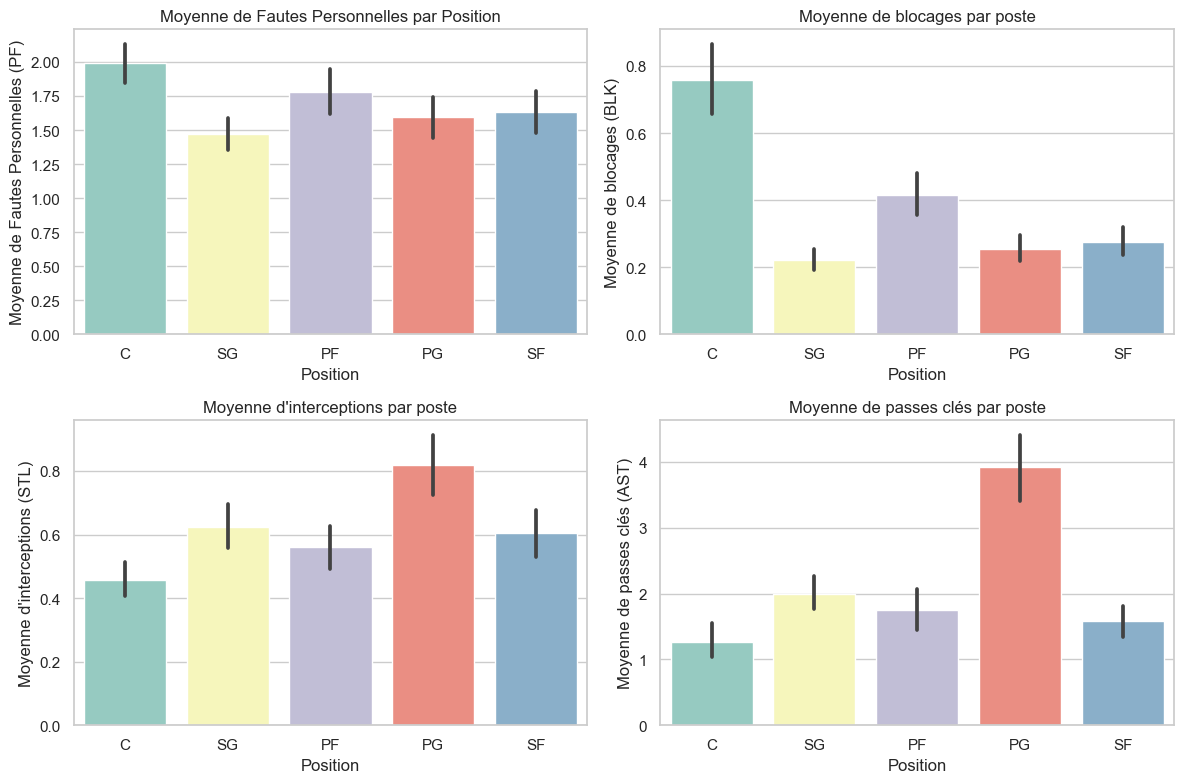

In [31]:
# Sélectionnez les variables d'intérêt et la variable 'Pos'
subset_df = df[['Pos', 'PF', 'BLK', 'STL', 'AST']]

# Créez 4 graphiques en barres pour chaque variable en fonction de 'Pos'
plt.figure(figsize=(12, 8))

# Graphique pour 'PF'
plt.subplot(2, 2, 1)
sns.barplot(x='Pos', y='PF', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de Fautes Personnelles (PF)")
plt.title("Moyenne de Fautes Personnelles par Position")

# Graphique pour 'BLK'
plt.subplot(2, 2, 2)
sns.barplot(x='Pos', y='BLK', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de blocages (BLK)")
plt.title("Moyenne de blocages par poste")

# Graphique pour 'STL'
plt.subplot(2, 2, 3)
sns.barplot(x='Pos', y='STL', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne d'interceptions (STL)")
plt.title("Moyenne d'interceptions par poste")

# Graphique pour 'AST'
plt.subplot(2, 2, 4)
sns.barplot(x='Pos', y='AST', data=subset_df, palette="Set3")
plt.xlabel("Position")
plt.ylabel("Moyenne de passes clés (AST)")
plt.title("Moyenne de passes clés par poste")

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

Dans cette dernière phase d'analyse, nous avons choisi d'étudier certaines variables plus spécifiques. Nous pouvons également émettre plusieurs tendances : 

- le poste de pivot va avoir tendance à provoquer davantage de fautes mais à bloquer davantage de ballons. Cela peut s'expliquer par la position du joueur et la volonté d'obtenir le rebond par exemple.
- le meneur, l'ailier et l'ailier fort avoir avoir un effet inverse, à savoir provoquer un très faible nombre de fautes du fait d'une position plus en retrait de la raquette. Cependant, ces postes vont intercepter davantage de ballons notamment le meneur avec environ 0.8 interceptions par match.
- la moyenne de passes clés (décisives) par match est naturellement dominé par le poste de poste avec une moyenne de près de 4 passes par match. Cela va se justifier par la position plus ouverte pour ce poste et sa fonction.

### 3. Création d'une sélection des meilleurs joueurs

#### Analyse Top 10 saison 2023

Dans cette dernière étape, nous allons procéder à un classement des meilleurs joueurs.
Pour cela, nous allons créer une variable total qui va uniquement faire une somme de l'ensemble des données.

Bien entendu, certaines variables vont avoir un impact positif (rebonds, points, passes) et certaines négatives (fautes par exemple).
L'objectif étant de pouvoir obtenir un top 10 avec une précision pour le poste et l'âge.

Ensuite, nous pourrons procéder à une analyse du meilleur joueur selon le poste.

###### A. Top 10 global

In [32]:
# TOP 10

# Calculez le total des variables numériques pour chaque joueur
df['Total'] = df.select_dtypes(include=['int64', 'float64']).sum(axis=1)

# Triez le DataFrame par la colonne 'Total' en ordre décroissant et sélectionnez les 10 premiers
top_10_players = df.nlargest(10, 'Total')

# Affichez les 10 meilleurs joueurs
print("Top 10 joueurs en fonction de l'ensemble des variables :")
print(top_10_players[['Player', 'Total', 'Pos', 'Age']])

top_10_players

Top 10 joueurs en fonction de l'ensemble des variables :
                      Player    Total Pos  Age
464             Jayson Tatum  348.271  SF   24
142              Joel Embiid  348.195   C   28
124              Luka Dončić  343.628  PG   23
404            Julius Randle  342.248  PF   28
10     Giannis Antetokounmpo  340.941  PF   28
163  Shai Gilgeous-Alexander  335.224  PG   24
139          Anthony Edwards  332.425  SG   21
116            DeMar DeRozan  331.348  SF   33
441            Pascal Siakam  329.316  PF   28
427         Domantas Sabonis  328.301   C   26


,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total
464,Jayson Tatum,SF,24,74,74,36.9,9.8,21.1,0.466,3.2,9.3,0.350,6.6,11.8,0.558,0.543,7.2,8.4,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,348.271
142,Joel Embiid,C,28,66,66,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,348.195
124,Luka Dončić,PG,23,66,66,36.2,10.9,22.0,0.496,2.8,8.2,0.342,8.1,13.8,0.588,0.560,7.8,10.5,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,343.628
404,Julius Randle,PF,28,77,77,35.5,8.5,18.6,0.459,2.8,8.3,0.343,5.7,10.3,0.553,0.536,5.2,6.9,0.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,342.248
10,Giannis Antetokounmpo,PF,28,63,63,32.1,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,340.941
163,Shai Gilgeous-Alexander,PG,24,68,68,35.5,10.4,20.3,0.510,0.9,2.5,0.345,9.5,17.8,0.533,0.531,9.8,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,335.224
139,Anthony Edwards,SG,21,79,79,36.0,8.9,19.5,0.459,2.7,7.3,0.369,6.3,12.2,0.513,0.528,4.0,5.3,0.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6,332.425
116,DeMar DeRozan,SF,33,74,74,36.2,8.9,17.6,0.504,0.6,1.9,0.324,8.3,15.7,0.526,0.522,6.2,7.1,0.872,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5,331.348
441,Pascal Siakam,PF,28,71,71,37.4,8.9,18.5,0.480,1.3,4.0,0.324,7.6,14.5,0.523,0.515,5.2,6.7,0.774,1.8,6.0,7.8,5.8,0.9,0.5,2.4,3.2,24.2,329.316
427,Domantas Sabonis,C,26,79,79,34.6,7.3,11.9,0.615,0.4,1.1,0.373,6.9,10.8,0.639,0.632,4.1,5.5,0.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,328.301


In [33]:
top_10_players

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total
464,Jayson Tatum,SF,24,74,74,36.9,9.8,21.1,0.466,3.2,9.3,0.350,6.6,11.8,0.558,0.543,7.2,8.4,0.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,348.271
142,Joel Embiid,C,28,66,66,34.6,11.0,20.1,0.548,1.0,3.0,0.330,10.0,17.1,0.587,0.573,10.0,11.7,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,348.195
124,Luka Dončić,PG,23,66,66,36.2,10.9,22.0,0.496,2.8,8.2,0.342,8.1,13.8,0.588,0.560,7.8,10.5,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,343.628
404,Julius Randle,PF,28,77,77,35.5,8.5,18.6,0.459,2.8,8.3,0.343,5.7,10.3,0.553,0.536,5.2,6.9,0.757,1.8,8.1,10.0,4.1,0.6,0.3,2.8,3.0,25.1,342.248
10,Giannis Antetokounmpo,PF,28,63,63,32.1,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,340.941
163,Shai Gilgeous-Alexander,PG,24,68,68,35.5,10.4,20.3,0.510,0.9,2.5,0.345,9.5,17.8,0.533,0.531,9.8,10.9,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,335.224
139,Anthony Edwards,SG,21,79,79,36.0,8.9,19.5,0.459,2.7,7.3,0.369,6.3,12.2,0.513,0.528,4.0,5.3,0.756,0.6,5.2,5.8,4.4,1.6,0.7,3.3,2.4,24.6,332.425
116,DeMar DeRozan,SF,33,74,74,36.2,8.9,17.6,0.504,0.6,1.9,0.324,8.3,15.7,0.526,0.522,6.2,7.1,0.872,0.5,4.2,4.6,5.1,1.1,0.5,2.1,2.5,24.5,331.348
441,Pascal Siakam,PF,28,71,71,37.4,8.9,18.5,0.480,1.3,4.0,0.324,7.6,14.5,0.523,0.515,5.2,6.7,0.774,1.8,6.0,7.8,5.8,0.9,0.5,2.4,3.2,24.2,329.316
427,Domantas Sabonis,C,26,79,79,34.6,7.3,11.9,0.615,0.4,1.1,0.373,6.9,10.8,0.639,0.632,4.1,5.5,0.742,3.2,9.1,12.3,7.3,0.8,0.5,2.9,3.5,19.1,328.301


Dans ce premier classement, nous pouvons déjà procéder à une de nombreux constats :

- Ces derniers semblent présenter un score assez proche notamment les 2 premiers qui ont des statistiques assez similaires alors que nous sommes sur 2 postes différents.
- Les meilleurs joueurs ont un âge inférieur à 30 ans à l'exception d'un seul joueur (DeRozan qui a 33 ans), cette variable ne peut donc être le critère principal de sélection mais peut permettre, par exemple, de créer un filtre pour obtenir des joueurs avec un âge spécifique.
Toutefois, nous remarquons la présence de 4 joueurs jeunes (nous estimons moins de 25 ans). Cela peut être intéressant dans le cadre d'une volonté de rajeunissement d'une équipe par exemple ou d'un choix à long terme.

###### B. Top joueurs en fonction du poste

In [34]:
# Meilleur joueur par poste

# Sélectionnez la variable d'intérêt et la variable 'Pos'
subset_df = df[['Pos', 'Total']]  # Remplacez 'PTS' par la variable de votre choix

# Trouvez le meilleur joueur pour chaque poste
best_players_by_position = subset_df.groupby('Pos')['Total'].idxmax()  # Changez 'PTS' si nécessaire

# Utilisez les indices pour obtenir les noms des joueurs correspondants
best_players = df.loc[best_players_by_position, ['Pos', 'Player', 'Total', 'Age']]  # Incluez d'autres variables si nécessaire

# Affichez les meilleurs joueurs par poste
print("Meilleur joueur par poste :")
print(best_players)

best_players

Meilleur joueur par poste :
    Pos           Player    Total  Age
142   C      Joel Embiid  348.195   28
404  PF    Julius Randle  342.248   28
124  PG      Luka Dončić  343.628   23
464  SF     Jayson Tatum  348.271   24
139  SG  Anthony Edwards  332.425   21


,Pos,Player,Total,Age
142,C,Joel Embiid,348.195,28
404,PF,Julius Randle,342.248,28
124,PG,Luka Dončić,343.628,23
464,SF,Jayson Tatum,348.271,24
139,SG,Anthony Edwards,332.425,21


Cette seconde étape peut davantage être liée à une notion de filtre additionnel en fonction d'un poste ou d'une donnée souhaitée.
Dans notre cas, nous avons sélectionné en fonction du poste. Il peut être intéressant d'analyser en fonction d'une variable souhaitée (rebonds par match, points, passes clés, ...) pour obtenir un joueur avec un profil spécifique.

# Conclusion

En conclusion, ce projet a atteint avec succès ses objectifs en utilisant des techniques de web scraping avancées et en effectuant une analyse exploratoire des données approfondie sur le jeu de données obtenu.

Nous avons tout d'abord souligné l'importance de connaître la source des données pour garantir leur qualité et leur fiabilité, ce qui est essentiel pour une analyse exploratoire réussie.

Au cours de cette analyse, nous avons examiné diverses statistiques ainsi que des variables clés dans le domaine du basket-ball. Cette démarche nous a permis d'acquérir une compréhension approfondie de notre jeu de données.

Notamment, la phase finale de notre projet, la création d'un top 10 des joueurs en fonction de différentes variables, démontre l'utilité de ces analyses pour des décisions stratégiques telles que les transferts de joueurs. Par exemple, nous pourrions envisager de transférer Joel Embiid pour succéder à Haslem, qui, à 42 ans, est probablement proche de la retraite.

Bien que nous ayons choisi de nous concentrer principalement sur le web scraping et l'analyse des données dans ce projet, il est important de noter que d'autres étapes, telles que la modélisation, le feature engineering et la gestion des données manquantes, pourraient être envisagées pour des analyses plus approfondies.

En conclusion, nous avons pleinement répondu à la problématique définie pour ce projet. Il convient de noter que les compétences en web scraping et en analyse de données sont polyvalentes et peuvent être appliquées à de nombreux autres domaines, ouvrant ainsi la voie à de nombreuses études futures passionnantes.